In [2]:
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Open dataset and save to variable name "data"
data = pd.read_csv("fuel_ferc1.csv")

In [4]:
# View the head values
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [5]:
# Print the first 5 rows
data.sample(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
2598,f1_fuel_1996_12_143_1_9,143,1996,chalk point,gas,mcf,320445.0,1.04086,3.142,2.957,3.018
6716,f1_fuel_1999_12_194_3_13,194,1999,rock river unit 2,coal,ton,70724.0,18.71000,28.710,25.300,1.535
27516,f1_fuel_2016_12_88_0_2,88,2016,mill creek,gas,mcf,353859.0,1.01000,10.352,10.352,10.249
25677,f1_fuel_2015_12_164_0_7,164,2015,knox lee,gas,mcf,1269253.0,1.03300,2.900,2.900,2.810
1895,f1_fuel_1995_12_39_0_3,39,1995,montville,gas,mcf,1733652.0,1.03000,2.511,2.474,2.438


In [6]:
# Check the column names of the dataset
print(data.columns)

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')


# Data Description
* record_id: Record ID
* utility_id_ferc1: ID given by FERC
* report_year: Year the report was filed
* plant_name_ferc1: Name of the fuel plant
* fuel_type_code_pudl: Type of fuel
* fuel_unit: Unit used to measure fuel
* fuel_qty_burned: Amount of fuel burned
* fuel_mmbtu_per_unit: Energy per unit
* fuel_cost_per_unit_burned: Cost of fuel per unit burned
* fuel_cost_per_unit_delivered: Cost of fuel per unit delivered
* fuel_cost_per_mmbtu: Cost of fuel per mmbtu

In [7]:
# Check the number of rows and columns
data.shape

(29523, 11)

In [8]:
# Get an overview of the data using the describe function
# data.describe

In [9]:
# Check for unique values in the data set
data.nunique()

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11227
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12605
dtype: int64

In [10]:
# Check for missing values
data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [11]:
# Drop empty rows from fuel_unit
data.dropna(subset=['fuel_unit'], inplace=True)

#print(data['fuel_unit'])
data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [12]:
# Group types of fuel by type
data['fuel_type_code_pudl'].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [13]:
# Amount of each type of fuel burned
data.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()

fuel_type_code_pudl
coal        8496
gas        11433
nuclear      803
oil         8043
other        131
waste        437
Name: fuel_type_code_pudl, dtype: int64

In [14]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29343.000000,29343.000000,2.934300e+04,29343.000000,29343.000000,2.934300e+04,29343.000000
mean,118.507037,2005.819105,2.609171e+06,8.477481,209.756592,9.230343e+02,18.543975
std,74.241226,7.019855,8.798699e+06,10.537478,2863.194789,6.898652e+04,2097.367750
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.375050e+04,1.024000,5.230000,3.793000e+00,1.950000
50%,122.000000,2006.000000,2.524640e+05,5.763072,26.039000,1.749000e+01,4.140000
75%,176.000000,2012.000000,1.424218e+06,17.000000,47.172000,4.220850e+01,7.752000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


## Percentage Change in Fuel Cost Per Unit Burned in 1998 Compared to 1994

In [15]:
# Isolate data with fuel type as coal
coal_data = data[data.fuel_type_code_pudl == 'coal' ]
#coal_data

In [16]:
# Isolate coal data with year 1994
_1994_data = coal_data[coal_data.report_year == 1994]
#_1994_data

In [17]:
# Isolate coal data with year 1998
_1998_data = coal_data[coal_data.report_year == 1998]
#_1998_data

In [68]:
# Find the sum of fuel cost burned in 1994
_1994_data.sum()['fuel_cost_per_unit_burned']

14809.322000000013

In [69]:
# Find the sum of fuel cost burned in 1998
_1998_data.sum()['fuel_cost_per_unit_burned']

11851.690000000011

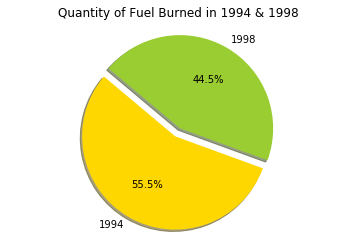

80.02857929620276


In [83]:
# Assign each type of fuel to variable label
# Assign the sizes and colours

labels = '1994', '1998'
sizes = [_1994_data.sum()['fuel_cost_per_unit_burned'], _1998_data.sum()['fuel_cost_per_unit_burned']]
colors = ['gold', 'yellowgreen']
explode = (0, 0.1)
plt.title('Quantity of Fuel Burned in 1994 & 1998', fontdict=None, loc='center', pad=None)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()



per = _1998_data.sum()['fuel_cost_per_unit_burned'] / _1994_data.sum()['fuel_cost_per_unit_burned'] * 100
print(per)

In [59]:
# sns.regplot(x = _1994_data['fuel_cost_per_unit_burned'], y = _1998_data['fuel_cost_per_unit_burned'], fit_reg = True)

# _1994_data.shape

In [ ]:
_1998_data.shape

# Data Visualisation

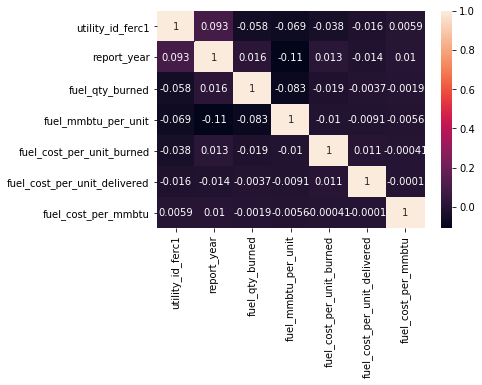

In [22]:
sns.heatmap(data.corr(), annot=True)

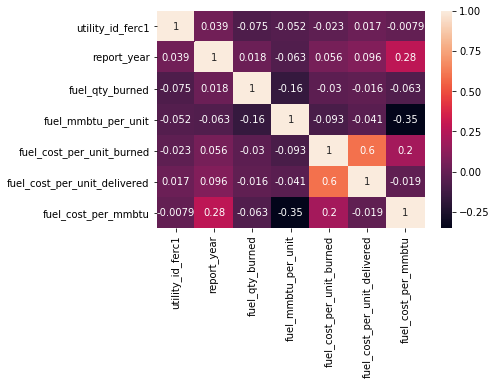

In [23]:
# Since there doesn't seem to be a strong relationship between the variables
# Plot the heat map again with a smaller sample size
# Select 400 random values
sample_set = data.sample(n=400, random_state = 5)
sns.heatmap(sample_set.corr(), annot=True)

## Quantity of Fuel Burned in Years

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Fuel Quantity')

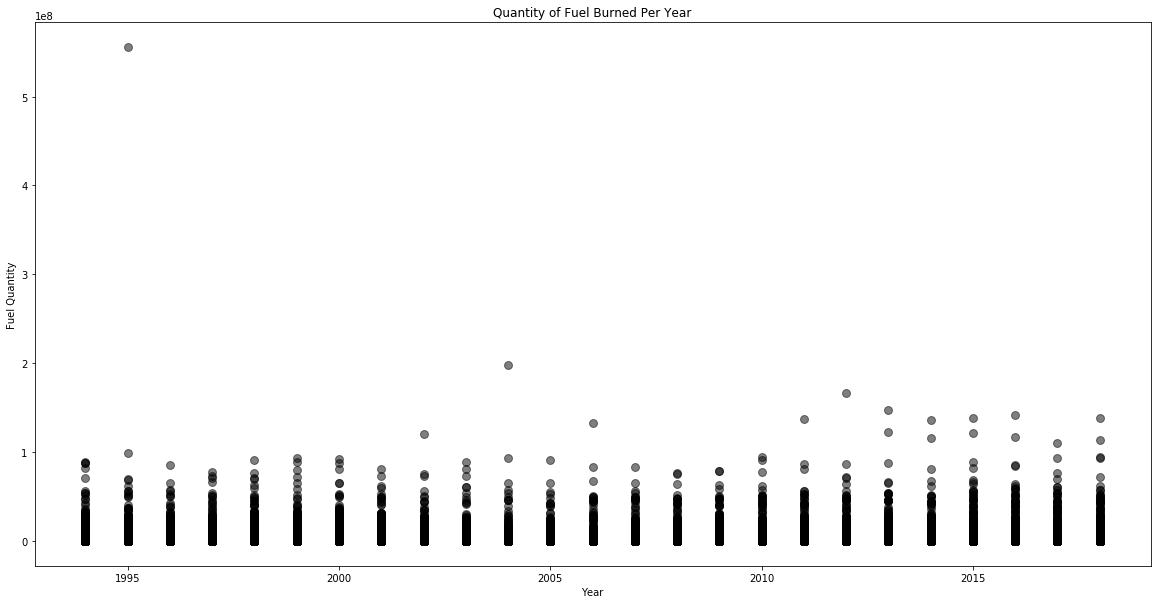

In [24]:
x = data['report_year']
y = data['fuel_qty_burned']
colors = [0,0,0]
area = np.pi*20

plt.figure(figsize=(20,10))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Quantity of Fuel Burned Per Year')
plt.xlabel('Year')
plt.ylabel('Fuel Quantity')


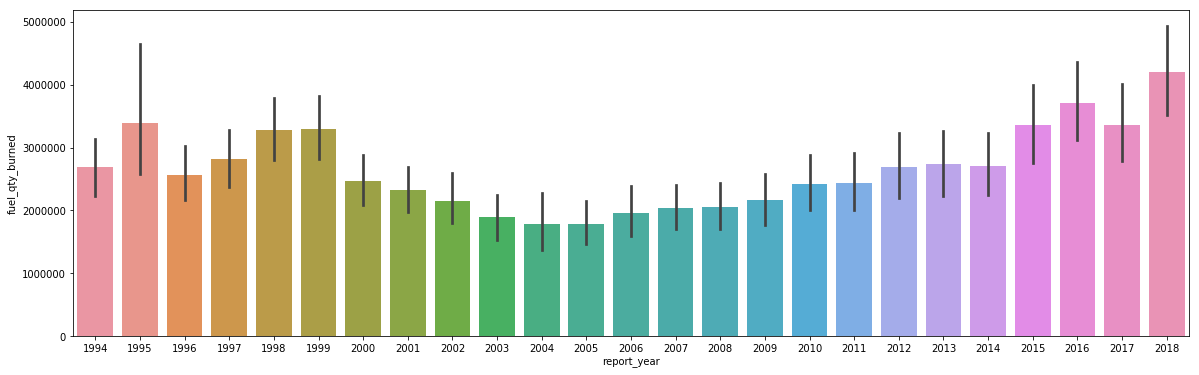

In [25]:
plt.figure(figsize=(20,6))
ax = sns.barplot(data['report_year'], data['fuel_qty_burned'])

## Quantity of Fuel Burned by Type

	 Quantity of Fuel Burned by Type in %


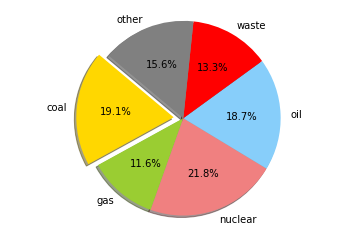

In [26]:
# Assign each type of fuel to variable label
# Assign the sizes and colours

labels = 'coal', 'gas', 'nuclear', 'oil', 'waste', 'other'
sizes = [215, 130, 245, 210, 150, 175]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'grey']
explode = (0.1, 0, 0, 0, 0, 0)
title = '\t Quantity of Fuel Burned by Type in %'
print(title)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

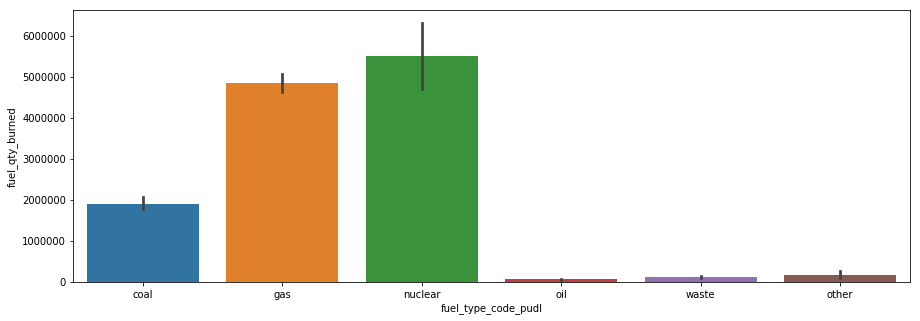

In [27]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data['fuel_type_code_pudl'], data['fuel_qty_burned'])

## Quantity of Fuel Burned by Fuel Unit

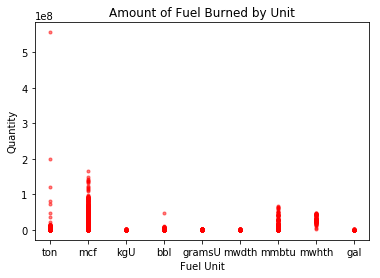

In [28]:
# Scatter graph of amount of fuel burned
x = data['fuel_unit']
y = data['fuel_qty_burned']
colors = ['red']
area = np.pi*3

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Amount of Fuel Burned by Unit')
plt.xlabel('Fuel Unit')
plt.ylabel('Quantity')
plt.show()

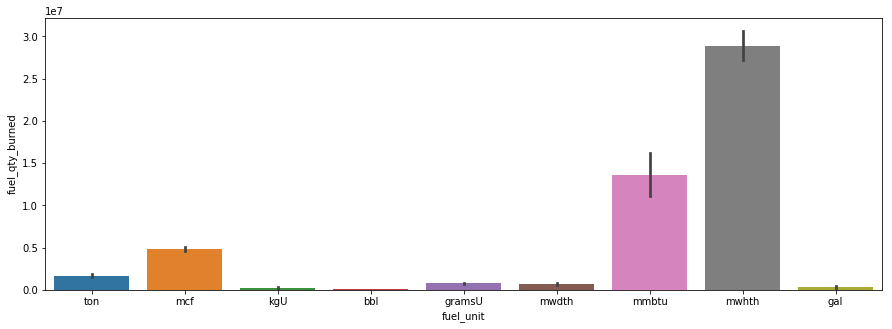

In [29]:
# Bar graph to get a clearer picture 

plt.figure(figsize=(15,5))
ax = sns.barplot(data['fuel_unit'], data['fuel_qty_burned'])

## Quantity of Fuel Burned by Top 10 Plants

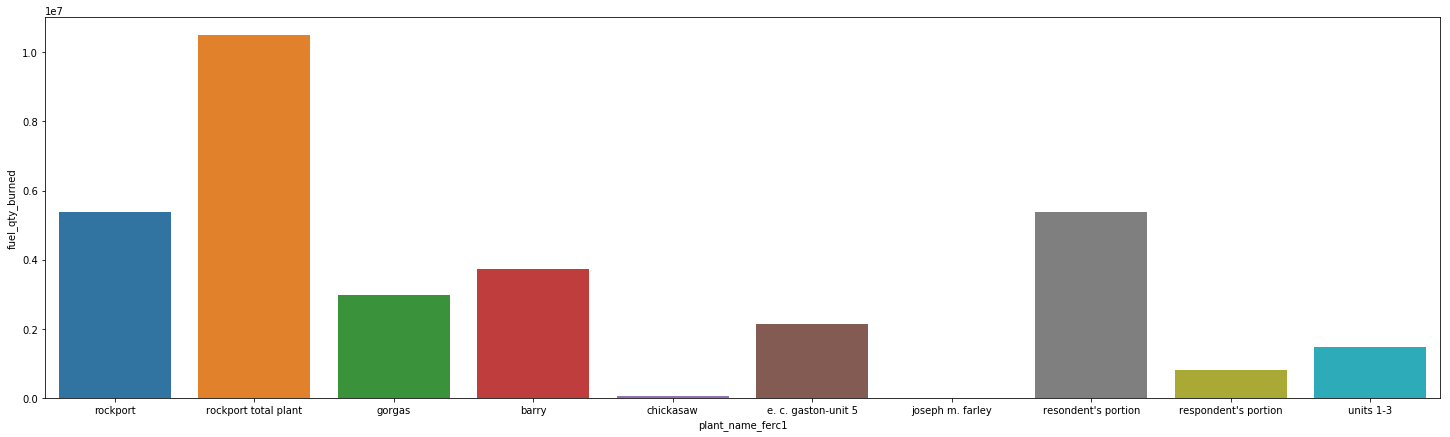

In [30]:
var = data['plant_name_ferc1'] #assign plant names to variable var
var = var[:10,] #take the top 10 rows

plt.figure(figsize=(25,7))
ax = sns.barplot(var, data['fuel_qty_burned']) #plot var(plant names) vs amount of fuel burned


## Amount of Fuel Burnt Per Year

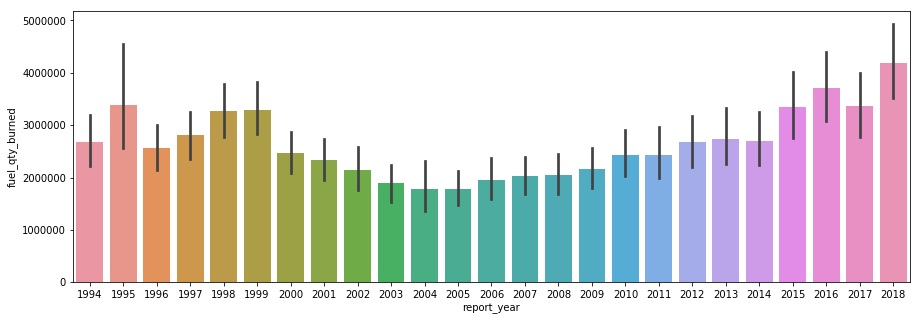

In [31]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data['report_year'], data['fuel_qty_burned'])

In [32]:
# Pair plot the data to get a broad overview
# sns.pairplot(data)

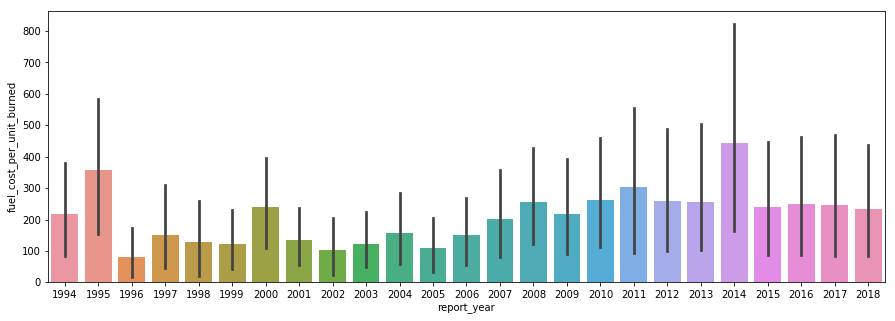

In [33]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data['report_year'], data['fuel_cost_per_unit_burned'])

# Part One Quiz

## Question 1

In [42]:
c = [1,2,3,4,5,6]
d = [13, 21, 34]

In [43]:
c.extend(d)

In [44]:
print(c)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


## Question 2

In [45]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Question 3

In [63]:
data['fuel_cost_per_unit_burned'].describe()

count     29343.000000
mean        209.756592
std        2863.194789
min        -276.080000
25%           5.230000
50%          26.039000
75%          47.172000
max      139358.000000
Name: fuel_cost_per_unit_burned, dtype: float64

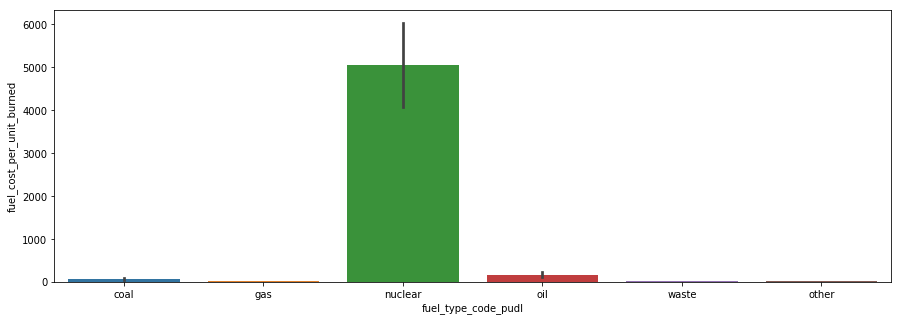

In [61]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data['fuel_type_code_pudl'], data['fuel_cost_per_unit_burned'])

## Question 4

In [50]:
data['fuel_mmbtu_per_unit'].describe()

count    29343.000000
mean         8.477481
std         10.537478
min          0.000001
25%          1.024000
50%          5.763072
75%         17.000000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

## Question 6

In [51]:
data.nunique()

record_id                       29343
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2307
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26270
fuel_mmbtu_per_unit             11178
fuel_cost_per_unit_burned       19335
fuel_cost_per_unit_delivered    16612
fuel_cost_per_mmbtu             12565
dtype: int64

In [55]:
# Check for missing values
data.isnull().sum()
# Since null values have already been dropped, it returns 0
# Refernce value of 180 null values in fuel_unit is from above

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [57]:
# Check the number of rows and columns
data.shape

(29343, 11)

In [58]:
# Divide number of null values by total number of rows
# 180 empty fuel_unit rows
# 29343 rows in total
180 / 29343 * 100

0.6134342091810653

In [ ]:
fuel_unit, 180 missing values, 0.613%

## Question 8

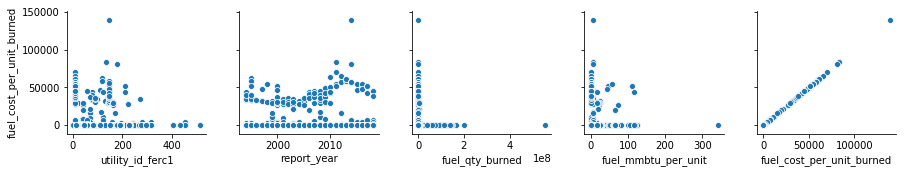

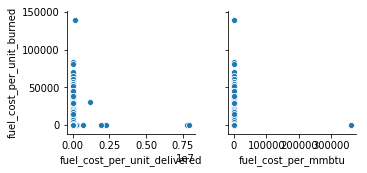

In [65]:
numeric_dataset = data.select_dtypes(include= ['float64','int64'])

for i in range(0,len(numeric_dataset.columns),5):
    sns.pairplot(numeric_dataset,y_vars = 'fuel_cost_per_unit_burned', x_vars = numeric_dataset.columns[i:i+5])

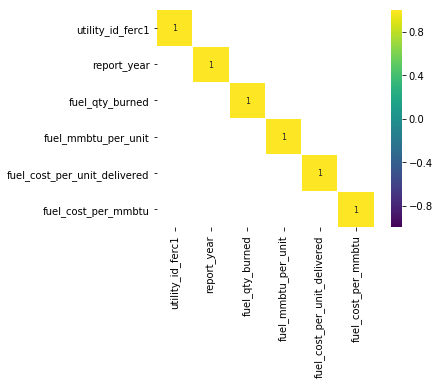

In [74]:
corr = numeric_dataset.drop('fuel_cost_per_unit_burned',axis=1).corr()
sns.heatmap(corr[(corr>=0.1)| (corr <= -0.4)], cmap = 'viridis', vmax = 1.0, vmin = -1.0, linewidth = 0.1,annot=True,annot_kws={"size":8}, square = True)

## Question 10 - Fuel Cost Per Unit Delivered

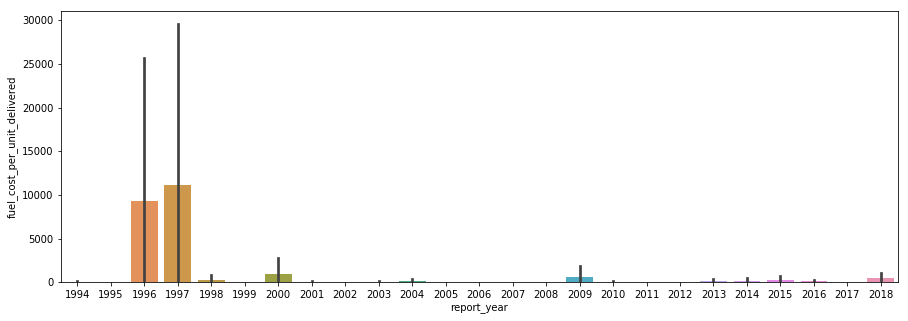

In [60]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data['report_year'], data['fuel_cost_per_unit_delivered'])